In [ ]:
"""
Null Hypothesis (H₀):
There is no difference in the win rate for the Saudi Arabia national team 
when playing at home compared to when playing away.
(In statistical terms: Win rate at home = Win rate away)
Alternative Hypothesis (H₁):
The Saudi Arabia national team has a home advantage, meaning the win rate is higher when playing at home than when playing away.
"""

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [238]:
df_goals= pd.read_csv('goalscorers.csv')
df_results=pd.read_csv('results.csv')


In [239]:
sa = 'Saudi Arabia'


In [241]:
df_saudi_results=df_results[(df_results['home_team']== sa)|(df_results['away_team']== sa)]
df_saudi_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
5958,1963-11-18,Egypt,Saudi Arabia,7,0,Friendly,Jakarta,Indonesia,True
7250,1967-12-10,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False
7590,1969-01-17,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False
8006,1970-03-28,Saudi Arabia,Kuwait,1,3,Gulf Cup,Isa Town,Bahrain,True
8007,1970-03-30,Bahrain,Saudi Arabia,0,0,Gulf Cup,Isa Town,Bahrain,False
...,...,...,...,...,...,...,...,...,...
48863,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True
48871,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True
48878,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True
48885,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True


In [242]:
df_saudi_goals   = df_goals[(df_goals['team'] == sa) | (df_goals['home_team'] == sa) | (df_goals['away_team'] == sa)]
df_saudi_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
7672,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Samir Sultan Al Fahad,22.0,False,False
7673,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Saoud Al Gassem Mohammed Bo Saeed,54.0,False,False
7685,1976-11-26,Syria,Saudi Arabia,Syria,Abdul Hamid Al Katbi,36.0,False,False
7686,1976-11-26,Syria,Saudi Arabia,Saudi Arabia,Mohammed Abdul Ghani,44.0,False,False
7687,1976-11-26,Syria,Saudi Arabia,Syria,Marwan Khalifa Khouri,82.0,False,False
...,...,...,...,...,...,...,...,...
44399,2025-06-19,Saudi Arabia,United States,United States,Chris Richards,63.0,False,False
44410,2025-06-22,Saudi Arabia,Trinidad and Tobago,Trinidad and Tobago,Dante Sealy,10.0,False,False
44411,2025-06-22,Saudi Arabia,Trinidad and Tobago,Saudi Arabia,Firas Al-Buraikan,60.0,False,False
44430,2025-06-28,Mexico,Saudi Arabia,Mexico,Alexis Vega,49.0,False,False


# clean data 

In [249]:


# df_saudi_goals['date']=pd.to_datetime(df_saudi_goals ['date'])
# df_saudi_results['date']=pd.to_datetime(df_saudi_results ['date'])

In [69]:
df_saudi_results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
5958,1963-11-18,Egypt,Saudi Arabia,7,0,Friendly,Jakarta,Indonesia,True
7250,1967-12-10,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False
7590,1969-01-17,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False
8006,1970-03-28,Saudi Arabia,Kuwait,1,3,Gulf Cup,Isa Town,Bahrain,True


In [71]:
df_saudi_results['tournament'].unique()

array(['Friendly', 'Gulf Cup', 'AFC Asian Cup qualification',
       'Palestine Cup', 'FIFA World Cup qualification', 'Asian Games',
       'AFC Asian Cup', 'Arab Cup', 'Confederations Cup',
       'FIFA World Cup', 'WAFF Championship', 'OSN Cup', 'Gold Cup'],
      dtype=object)

In [246]:
df_saudi_results=df_saudi_results.dropna(subset='date')
df_saudi_goals=df_saudi_goals.dropna(subset='date')


In [248]:
df_saudi_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
7672,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Samir Sultan Al Fahad,22.0,False,False
7673,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Saoud Al Gassem Mohammed Bo Saeed,54.0,False,False
7685,1976-11-26,Syria,Saudi Arabia,Syria,Abdul Hamid Al Katbi,36.0,False,False
7686,1976-11-26,Syria,Saudi Arabia,Saudi Arabia,Mohammed Abdul Ghani,44.0,False,False
7687,1976-11-26,Syria,Saudi Arabia,Syria,Marwan Khalifa Khouri,82.0,False,False
...,...,...,...,...,...,...,...,...
44399,2025-06-19,Saudi Arabia,United States,United States,Chris Richards,63.0,False,False
44410,2025-06-22,Saudi Arabia,Trinidad and Tobago,Trinidad and Tobago,Dante Sealy,10.0,False,False
44411,2025-06-22,Saudi Arabia,Trinidad and Tobago,Saudi Arabia,Firas Al-Buraikan,60.0,False,False
44430,2025-06-28,Mexico,Saudi Arabia,Mexico,Alexis Vega,49.0,False,False


In [250]:
goal_summary=df_saudi_goals.groupby(['date', 'home_team', 'away_team']).agg(
    total_goals=('scorer','count'),
    scorers_list=('scorer', lambda x: list(x)),
    penalty_goals=('penalty','sum'),
    own_goal=('own_goal','sum')
).reset_index()
goal_summary

,date,home_team,away_team,total_goals,scorers_list,penalty_goals,own_goal
0,1976-11-12,Saudi Arabia,Syria,2,"[Samir Sultan Al Fahad, Saoud Al Gassem Mohamm...",0,0
1,1976-11-26,Syria,Saudi Arabia,3,"[Abdul Hamid Al Katbi, Mohammed Abdul Ghani, M...",0,0
2,1977-01-07,Saudi Arabia,Iran,3,"[Gholam Hossein Mazloumi, Hassan Rowshan, Ghol...",0,0
3,1977-04-22,Iran,Saudi Arabia,2,"[Mohsin Yousifi, Habib Shareefi]",0,0
4,1981-03-21,Saudi Arabia,Iraq,1,[Amin Dabo],0,0
...,...,...,...,...,...,...,...
193,2024-01-30,Saudi Arabia,South Korea,2,"[Abdullah Radif, Cho Gue-sung]",0,0
194,2025-06-15,Haiti,Saudi Arabia,1,[Saleh Al-Shehri],1,0
195,2025-06-19,Saudi Arabia,United States,1,[Chris Richards],0,0
196,2025-06-22,Saudi Arabia,Trinidad and Tobago,2,"[Dante Sealy, Firas Al-Buraikan]",0,0


In [251]:
df_saudi_results['date'] = pd.to_datetime(df_saudi_results['date'], errors='coerce')
goal_summary['date'] = pd.to_datetime(goal_summary['date'], errors='coerce')

In [252]:
df_merged = df_saudi_results.merge(goal_summary, on=['date', 'home_team', 'away_team'], how='left')

In [253]:
df_merged[['total_goals','penalty_goals', 'own_goal']]=df_merged[['total_goals','penalty_goals', 'own_goal']].fillna(0).astype(int)
df_merged['scorers_list'] = df_merged['scorers_list'].apply(
    lambda x:x if isinstance(x,list) else []) #syntax:lambda x: value_if_true if condition else value_if_false
df_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal
0,1963-11-18,Egypt,Saudi Arabia,7,0,Friendly,Jakarta,Indonesia,True,0,[],0,0
1,1967-12-10,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False,0,[],0,0
2,1969-01-17,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False,0,[],0,0
3,1970-03-28,Saudi Arabia,Kuwait,1,3,Gulf Cup,Isa Town,Bahrain,True,0,[],0,0
4,1970-03-30,Bahrain,Saudi Arabia,0,0,Gulf Cup,Isa Town,Bahrain,False,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,0,[],0,0
732,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True,0,[],0,0
733,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True,0,[],0,0
734,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True,0,[],0,0


In [125]:
df_merged['year']=df_merged['date'].dt.year

In [139]:
df_recent=df_merged[df_merged['year']>=2000].copy()
df_recent=df_recent.reset_index(drop=True) # default drop is false 
df_recent

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal,year
0,2000-05-21,Lebanon,Saudi Arabia,0,0,Friendly,Zahlé,Lebanon,False,0,[],0,0,2000
1,2000-05-24,Slovakia,Saudi Arabia,1,1,Friendly,Nitra,Slovakia,False,0,[],0,0,2000
2,2000-05-31,Hungary,Saudi Arabia,2,2,Friendly,Győr,Hungary,False,0,[],0,0,2000
3,2000-06-03,Slovenia,Saudi Arabia,2,0,Friendly,Ljubljana,Slovenia,False,0,[],0,0,2000
4,2000-09-24,Saudi Arabia,Syria,2,1,Friendly,Abha,Saudi Arabia,False,0,[],0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,0,[],0,0,2025
407,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True,0,[],0,0,2025
408,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025
409,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025


#  The top goalscorers in Saudi Arabia

In [254]:
df_exploded=df_recent.explode('scorers_list')
top_scorers =df_exploded['scorers_list'].value_counts().head(10).to_frame().reset_index()
top_scorers

,scorers_list,count
0,Mohammad Al-Sahlawi,19
1,Talal Al-Meshal,17
2,Yasser Al-Qahtani,14
3,Salem Al-Dawsari,13
4,Sami Al-Jaber,12
5,Fahad Al-Muwallad,10
6,Obeid Al-Dosari,10
7,Mohammad Al-Shalhoub,9
8,Saleh Al-Shehri,8
9,Taisir Al-Jassim,8


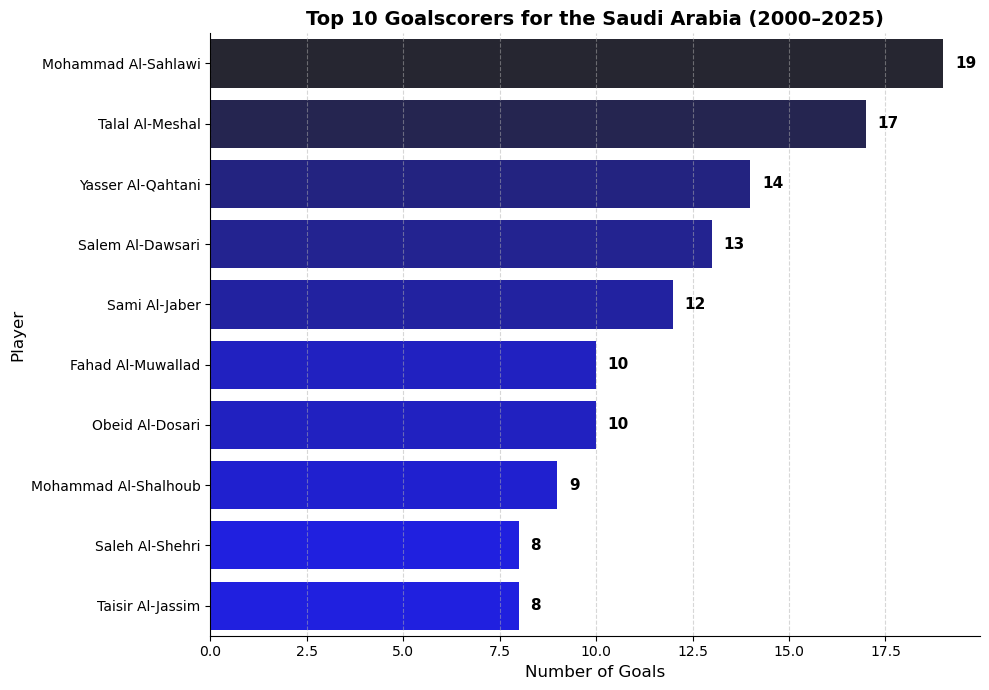

In [255]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.barplot(data=top_scorers,x='count',y='scorers_list',hue='count',palette='dark:b_r',legend=False)
plt.title('Top 10 Goalscorers for the Saudi Arabia (2000–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i,v in enumerate(top_scorers['count']):
    plt.text(v+0.3,i,v,va='center',fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


# In which tournaments did Saudi Arabia score the most goals?

In [174]:
df_recent

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal,year
0,2000-05-21,Lebanon,Saudi Arabia,0,0,Friendly,Zahlé,Lebanon,False,0,[],0,0,2000
1,2000-05-24,Slovakia,Saudi Arabia,1,1,Friendly,Nitra,Slovakia,False,0,[],0,0,2000
2,2000-05-31,Hungary,Saudi Arabia,2,2,Friendly,Győr,Hungary,False,0,[],0,0,2000
3,2000-06-03,Slovenia,Saudi Arabia,2,0,Friendly,Ljubljana,Slovenia,False,0,[],0,0,2000
4,2000-09-24,Saudi Arabia,Syria,2,1,Friendly,Abha,Saudi Arabia,False,0,[],0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,0,[],0,0,2025
407,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True,0,[],0,0,2025
408,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025
409,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025


In [ ]:
def saudi_goals(row):
    if row['home_team'] == 'Saudi Arabia':
        return row['home_score']
    else:
        return row['away_score']

df_recent['saudi_goals'] = df_recent.apply(saudi_goals,axis=1)


tournament_goals = (
    df_recent.groupby('tournament')['saudi_goals']
    .sum()
    .sort_values(ascending=False)
)

tournament_goals=tournament_goals.head(5).to_frame().reset_index()
tournament_goals

,tournament,saudi_goals
0,FIFA World Cup qualification,211
1,Gulf Cup,73
2,AFC Asian Cup qualification,61
3,AFC Asian Cup,43
4,Arab Cup,23


C:\Users\HP\AppData\Local\Temp\ipykernel_13776\1628590861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tournament_goals,x='saudi_goals',y='tournament',palette="dark:b")


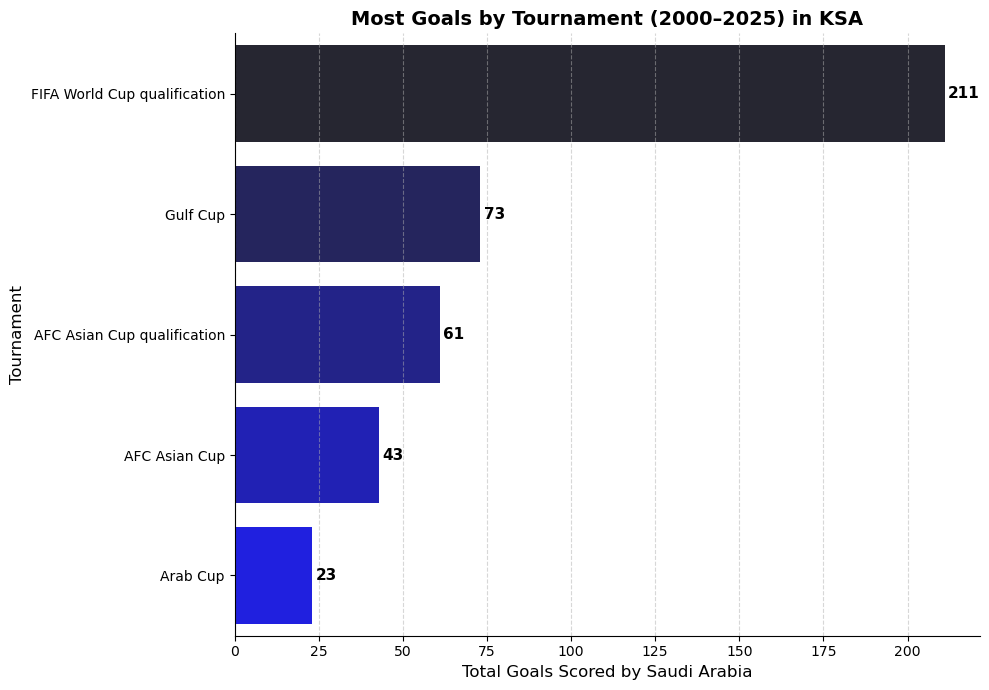

In [232]:
plt.figure(figsize=(10,7))
sns.barplot(data=tournament_goals,x='saudi_goals',y='tournament',palette="dark:b")
sns.despine()

for i,v in enumerate(tournament_goals['saudi_goals']):
    plt.text(v+1,i,v,va='center',fontweight='bold', fontsize=11)
plt.title('Most Goals by Tournament (2000–2025) in KSA', 
        fontsize=14, 
        fontweight='bold',
        loc='center')               
plt.xlabel('Total Goals Scored by Saudi Arabia',fontsize=12)
plt.ylabel('Tournament',fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [268]:
df_recent.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal,year,saudi_goals_correct,saudi_goals
10,2000-10-14,Saudi Arabia,Japan,1,4,AFC Asian Cup,Sidon,Lebanon,True,5,"[Atsushi Yanagisawa, Naohiro Takahara, Hiroshi...",0,1,2000,1,1
11,2000-10-17,Saudi Arabia,Qatar,0,0,AFC Asian Cup,Sidon,Lebanon,True,0,[],0,0,2000,0,0
12,2000-10-20,Saudi Arabia,Uzbekistan,5,0,AFC Asian Cup,Sidon,Lebanon,True,5,"[Marzouk Al-Otaibi, Mohammad Al-Shalhoub, Moha...",0,0,2000,5,5


# Correlation between Saudi goals and penalty goals

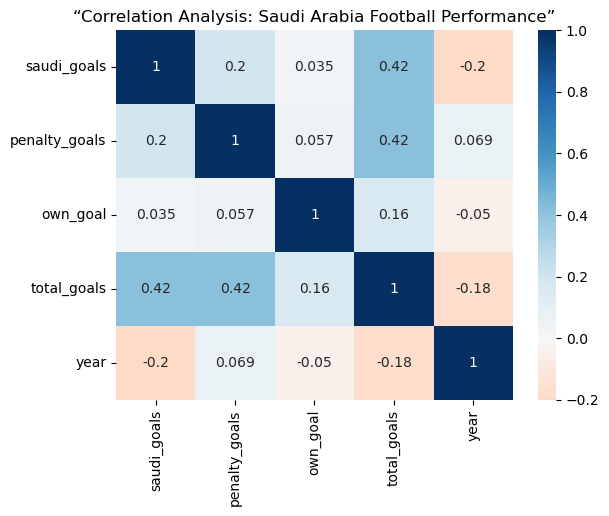

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=['saudi_goals','penalty_goals','own_goal','total_goals','year']
corr=df_recent[cols].corr()

# heatmap
sns.heatmap(corr, annot=True, cmap='RdBu', center=0)
plt.title('“Correlation Analysis: Saudi Arabia Football Performance”')
plt.show()


In [270]:
df_recent.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal,year,saudi_goals_correct,saudi_goals
10,2000-10-14,Saudi Arabia,Japan,1,4,AFC Asian Cup,Sidon,Lebanon,True,5,"[Atsushi Yanagisawa, Naohiro Takahara, Hiroshi...",0,1,2000,1,1
11,2000-10-17,Saudi Arabia,Qatar,0,0,AFC Asian Cup,Sidon,Lebanon,True,0,[],0,0,2000,0,0
12,2000-10-20,Saudi Arabia,Uzbekistan,5,0,AFC Asian Cup,Sidon,Lebanon,True,5,"[Marzouk Al-Otaibi, Mohammad Al-Shalhoub, Moha...",0,0,2000,5,5


### How has Saudi Arabia’s goal scoring changed over time (2000–2025)?

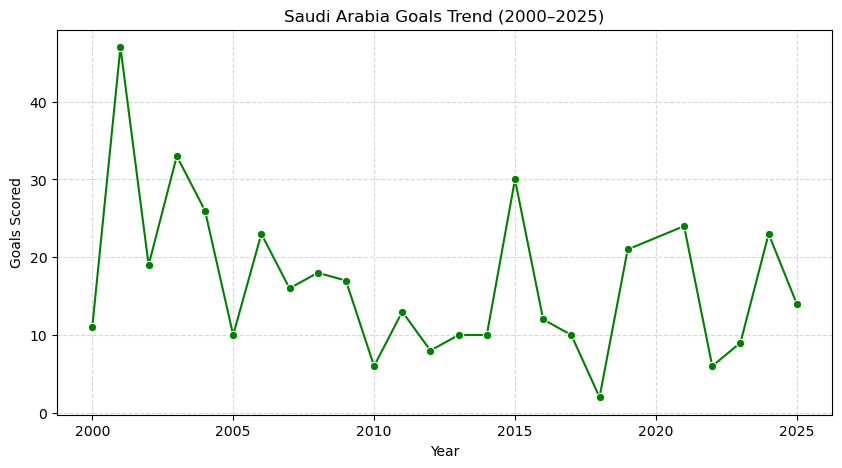

In [310]:
yearly_goals=df_recent.groupby('year')['saudi_goals'].sum().reset_index()
yearly_goals

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_goals,
    x='year',
    y='saudi_goals',
    marker='o',
    color='green'
)
plt.title('Saudi Arabia Goals Trend (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Chi-square test

In [317]:
from scipy.stats import chi2_contingency
df_recent['is_home']= df_recent['home_team'] == 'Saudi Arabia'

df_recent['saudi_win']=((df_recent['is_home'] & df_recent['home_score']>df_recent['away_score'] )|
(~df_recent['is_home'] & df_recent['away_score']>df_recent['home_score'])).astype(int)

table=pd.crosstab(df_recent['is_home'],df_recent['saudi_win'])
chi2, p_value, dof, expected =chi2_contingency(table)

home_rate = df_recent[df_recent['is_home']]['saudi_win'].mean()
away_rate = df_recent[~df_recent['is_home']]['saudi_win'].mean()

print(f"home_rate {home_rate:.2%}")
print(f"away_rate : {away_rate:.2%}")

alpha = 0.05
decision = "Reject H₀" if p_value < alpha else "Fail to reject H₀"

print(f"p_value:{p_value:.4f}")
print("Decision:", decision)

home_rate 29.84%
away_rate : 15.89%
p_value:0.0192
Decision: Reject H₀


In [314]:
df_recent['saudi_win'].value_counts()

saudi_win
0    177
1     54
Name: count, dtype: int64

In [278]:
table.columns

Index([0, 1], dtype='int64', name='saudi_win')